In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv(r"C:\Users\ASPIRE E 14\Music\DTS FGA 2019 - Unmul\projek akhir\ProjekAkhir\diabetes.csv")
data.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [2]:
data.dtypes

PatientID                   int64
Pregnancies                 int64
PlasmaGlucose               int64
DiastolicBloodPressure      int64
TricepsThickness            int64
SerumInsulin                int64
BMI                       float64
DiabetesPedigree          float64
Age                         int64
Diabetic                    int64
dtype: object

In [3]:
data.describe()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.502922e+06,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,2.892534e+05,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,1.000038e+06,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,1.252866e+06,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,1.505508e+06,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,1.755205e+06,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,1.999997e+06,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


In [4]:
#Kemudian mengehitung banyaknya Status atau kelompok layak dan tidak layak pada data
data['Diabetic'].value_counts() #Status '0'=Tidak dan '1'=Diabet

0    10000
1     5000
Name: Diabetic, dtype: int64

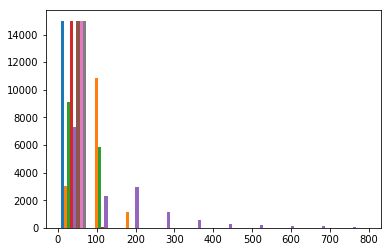

In [23]:
y=data['Diabetic'].values
x=data[['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']].values
#membuat histogram dari variabel bebas
plt.hist(x)
plt.savefig('KNNnotNorm.png')

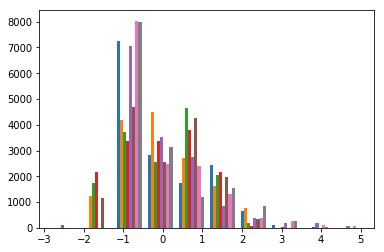

In [22]:
from sklearn import preprocessing
x_norm=preprocessing.StandardScaler().fit(x).transform(x.astype(float))
plt.hist(x_norm)
plt.savefig('KNNNorm.png')

In [7]:
#Menentukan data training dan data testing dengan perbandingan 80:20
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_norm,y,test_size=0.2)
print('Banyaknya Data Training:',x_train.shape,y_train.shape)
print('Banyaknya Data Testing:',x_test.shape,y_test.shape)

Banyaknya Data Training: (12000, 8) (12000,)
Banyaknya Data Testing: (3000, 8) (3000,)


In [8]:
#Proses KNN dengan k=2
from sklearn.neighbors import KNeighborsClassifier
k=2
KNN=KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)

In [9]:
#Hasil Prediksi
y_predict=KNN.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [10]:
print('Data Aktual:  ',y_test)
print('Data Prediksi:',y_predict)

Data Aktual:   [0 0 1 ... 0 0 1]
Data Prediksi: [0 0 0 ... 0 0 1]


Akurasi: 0.8436666666666667
[0.8493333333333334, 0.8436666666666667, 0.871, 0.861, 0.8796666666666667, 0.8706666666666667, 0.8746666666666667, 0.868, 0.874, 0.8716666666666667]


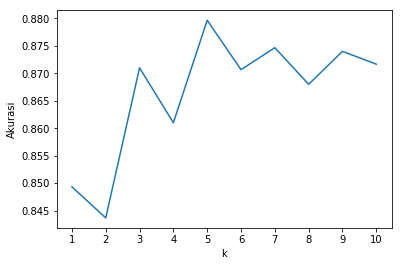

In [24]:
from sklearn import metrics
print('Akurasi:',metrics.accuracy_score(y_test,y_predict))

#Melakukan 10 kemungkinan nilai k
hasil=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
    prediksi=knn.predict(x_test)
    akurasi=metrics.accuracy_score(y_test,prediksi)
    hasil.append(akurasi)

print(hasil)
plt.plot(hasil)
plt.xlabel('k')
plt.ylabel('Akurasi')
plt.xticks(np.arange(10),('1','2','3','4','5','6','7','8','9','10'))
plt.savefig('KNN.png')
plt.show()

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
LR

yhat = LR.predict(x_test)
yhat

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [13]:
yhat_prob = LR.predict_proba(x_test)
yhat_prob

array([[0.92193206, 0.07806794],
       [0.9761815 , 0.0238185 ],
       [0.63341375, 0.36658625],
       ...,
       [0.44027491, 0.55972509],
       [0.8914067 , 0.1085933 ],
       [0.1970067 , 0.8029933 ]])

In [14]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.784

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('Logistik.png')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 579  403]
 [ 245 1773]]


Confusion matrix, without normalization
[[ 579  403]
 [ 245 1773]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2018
           1       0.70      0.59      0.64       982

   micro avg       0.78      0.78      0.78      3000
   macro avg       0.76      0.73      0.74      3000
weighted avg       0.78      0.78      0.78      3000



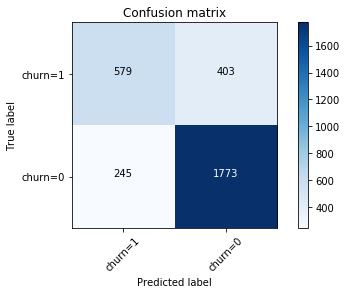

In [25]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')
plt.savefig('Logistik.png')
print (classification_report(y_test, yhat))